In [409]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from utils import PkdbModel, codeine_idx, pktype_data, filter_out, convert_unit, unstring
plt.style.use('seaborn-white')
import numpy as np
plt.rcParams.update({
        'axes.labelsize': '20',
        'axes.labelweight': 'bold',
        'axes.titlesize': 'medium',
        'axes.titleweight': 'bold',
        'legend.fontsize': '20',
        'xtick.labelsize': '20',
        'ytick.labelsize': '20',
        'figure.facecolor': '1.00'
    })

In [410]:
all_complete = PkdbModel("all_complete", destination="2-merged")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [411]:
all_complete.read()

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2909: DtypeWarning: Columns (21,24,25,37,77,98,99,101,107,111,116,118,122,128,129,130,145,152,153,157,162,163,164,173,180,181,182,185,186,192,196,200,204,208,220,224,228,229,231,232,233,234,235,239,252) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [412]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Loetsch2006")
substance_index = (all_complete.data["substance_name"] == "codeine")
substance_intervention_index = (all_complete.data["substance_name_intervention"] == "codeine")

In [413]:
#all_complete.data.columns.to_list()

In [414]:
all_complete.data["CYP"] = all_complete.data[('CYP2D6 phenotype', 'choice')]
all_complete.data["CYP_G"] = all_complete.data[('CYP2D6 genotype', 'choice')]


In [415]:
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]

In [416]:
my_data[["mean","value","median","time","value_intervention","unit","CYP","substance_name","substance_name_intervention"]]

,mean,value,median,time,value_intervention,unit,CYP,substance_name,substance_name_intervention
894,NaN,"['6.81e-05', '1.48e-04', '8.13e-04', '1.21e-03...",NaN,"['0.00e+00', '2.00e-01', '4.00e-01', '9.00e-01...",0.03,mole / liter,EM,codeine,codeine
961,NaN,"['0.00e+00', '1.91e-04', '6.87e-04', '7.29e-04...",NaN,"['0.00e+00', '2.00e-01', '5.00e-01', '9.00e-01...",0.03,mole / liter,EM,codeine,codeine
1030,NaN,"['3.32e-05', '1.46e-04', '6.34e-04', '5.54e-04...",NaN,"['0.00e+00', '3.00e-01', '7.00e-01', '1.30e+00...",0.03,mole / liter,EM,codeine,codeine
1074,NaN,"['1.94e-05', '3.33e-04', '1.50e-03', '1.10e-03...",NaN,"['3.00e-01', '5.00e-01', '8.00e-01', '1.40e+00...",0.03,mole / liter,IM,codeine,codeine
1125,NaN,"['5.70e-06', '5.13e-05', '7.19e-04', '8.16e-04...",NaN,"['0.00e+00', '2.00e-01', '5.00e-01', '1.00e+00...",0.03,mole / liter,PM,codeine,codeine
1187,NaN,"['1.01e-04', '7.18e-04', '1.40e-03', '9.91e-04...",NaN,"['5.00e-02', '1.00e-01', '2.50e-01', '6.40e-01...",0.03,mole / liter,UM,codeine,codeine
1248,NaN,"['0.00e+00', '2.76e-05', '4.28e-04', '6.21e-04...",NaN,"['4.00e-01', '5.00e-01', '8.00e-01', '1.20e+00...",0.03,mole / liter,EM,codeine,codeine
1317,NaN,"['2.27e-05', '1.48e-04', '5.80e-04', '6.82e-04...",NaN,"['1.00e-01', '3.00e-01', '5.00e-01', '1.00e+00...",0.03,mole / liter,IM,codeine,codeine
1383,NaN,"['4.42e-05', '1.98e-04', '6.93e-04', '7.40e-04...",NaN,"['0.00e+00', '3.00e-01', '7.00e-01', '1.30e+00...",0.03,mole / liter,IM,codeine,codeine
1452,NaN,"['8.78e-05', '8.38e-04', '1.23e-03', '9.32e-04...",NaN,"['0.00e+00', '1.00e-01', '2.00e-01', '6.00e-01...",0.03,mole / liter,EM,codeine,codeine


In [417]:
CYP_Categories = {"EM":"r",
                 "IM":"g",
                 "PM":"b",
                 "UM":"black"}

In [418]:
#fig, ax = plt.subplots()
frames = []
for i, df in my_data[["time","value","CYP", "individual_pk"]].dropna().iterrows():
    
    time_array = pd.to_numeric(eval(df["time"]))
    value_array = pd.to_numeric(eval(df["value"]))
    time_array = pd.to_numeric(eval(df["time"]))
    new_df = pd.concat([df]*len(time_array), axis=1).T.reset_index()
    new_df["time"] = time_array
    new_df["value"] = value_array
    frames.append(new_df)
df_all = pd.concat(frames)
    
    
    
    #ax.plot(x,y, color = CYP_Categories[df["CYP"]])


In [419]:
df_all = df_all.dropna(subset=["value"])

In [420]:
pd.to_numeric(eval(df["time"]))

array([0. , 0.2, 0.4, 0.5, 0.8, 1.2, 1.7, 2.2, 2.6, 3. , 3.5, 4. , 4.5,
       4.8])

In [421]:
time_array = pd.to_numeric(eval(df["time"]))
new_df = pd.concat([df]*len(time_array), axis=1).T.reset_index()
new_df["time"] = pd.to_numeric(eval(df["time"]))
new_df["value"] = pd.to_numeric(eval(df["value"]))

In [422]:
new_df

,index,time,value,CYP,individual_pk
0,1488,0.0,0.000085,EM,2420
1,1488,0.2,0.000879,EM,2420
2,1488,0.4,0.000991,EM,2420
3,1488,0.5,NaN,EM,2420
4,1488,0.8,0.000955,EM,2420
5,1488,1.2,0.000874,EM,2420
6,1488,1.7,0.000778,EM,2420
7,1488,2.2,0.000764,EM,2420
8,1488,2.6,0.000734,EM,2420
9,1488,3.0,0.000705,EM,2420


In [423]:
fmri = sns.load_dataset("fmri")


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


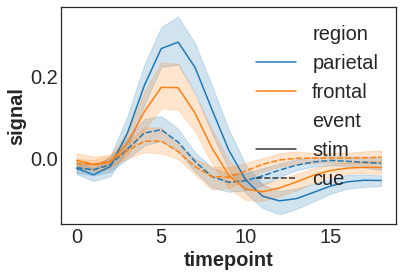

In [424]:
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [425]:
df_all.head()

,index,time,value,CYP,individual_pk
0,894,0.0,0.000068,EM,2423
1,894,0.2,0.000148,EM,2423
2,894,0.4,0.000813,EM,2423
3,894,0.9,0.001210,EM,2423
4,894,1.3,0.001200,EM,2423


In [426]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


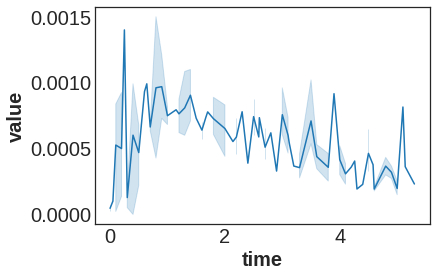

In [427]:
# Plot the responses for different events and regions
sns.lineplot(x="time", y="value",data=df_all)

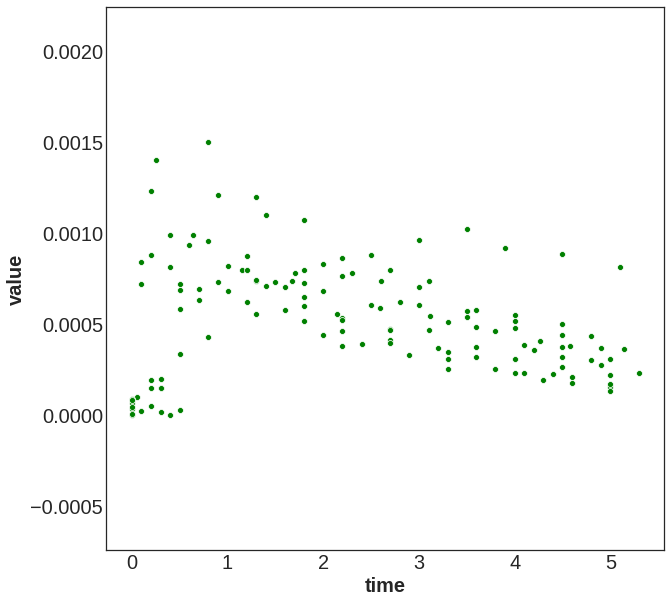

In [428]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(df_all["time"], df_all["value"] , color="g",ax = ax,)


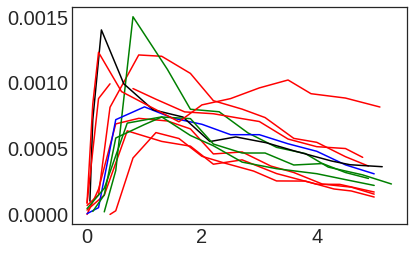

In [429]:
fig, ax = plt.subplots()
frames = []
for i, df in my_data[["time","value","CYP", "individual_pk"]].dropna().iterrows():
    
    time_array = pd.to_numeric(eval(df["time"]))
    value_array = pd.to_numeric(eval(df["value"]))
    time_array = pd.to_numeric(eval(df["time"]))
    new_df = pd.concat([df]*len(time_array), axis=1).T.reset_index()
    new_df["time"] = time_array
    new_df["value"] = value_array
    ax.plot(time_array,value_array, color = CYP_Categories[df["CYP"]])

    frames.append(new_df)
df_all = pd.concat(frames)
    
    
    

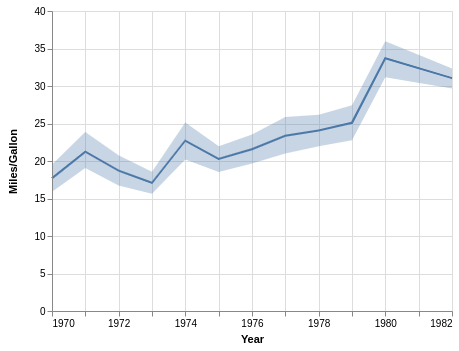

In [430]:
import altair as alt
from vega_datasets import data

source = data.cars()

# Configure the base chart
base = alt.Chart(source)

# Configure the line
line = base.mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)'
)

# Configure the confidence interval
confidence_interval = base.mark_area(opacity=0.3).encode(
    x='Year',
    y=alt.Y('ci0(Miles_per_Gallon)', title='Miles/Gallon'),
    y2='ci1(Miles_per_Gallon)'
)

# Draw the chart
confidence_interval + line

In [431]:
source

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01
5,10.0,8,429.0,198.0,15.0,ford galaxie 500,USA,4341,1970-01-01
6,9.0,8,454.0,220.0,14.0,chevrolet impala,USA,4354,1970-01-01
7,8.5,8,440.0,215.0,14.0,plymouth fury iii,USA,4312,1970-01-01
8,10.0,8,455.0,225.0,14.0,pontiac catalina,USA,4425,1970-01-01
9,8.5,8,390.0,190.0,15.0,amc ambassador dpl,USA,3850,1970-01-01


In [432]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Wu2014")
substance_index = (all_complete.data["substance_name"] == "morphine")
substance_intervention_index = (all_complete.data["substance_name_intervention"] == "codeine")
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]
my_data[["mean","time","sd","se","cv"]] =  my_data[["mean","time","sd","se","cv"]].applymap(eval).applymap(pd.to_numeric)

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [433]:
my_data

,study,output_type,pk,raw_pk,tissue,interventions,unit,substance_name,pktype,calculated,...,"(metabolic ratio, max)","(metabolic ratio, mean)","(metabolic ratio, min)","(metabolic ratio, unit)","(fat weight, count)","(fat weight, mean)","(fat weight, se)","(fat weight, unit)",CYP,CYP_G
8048,Wu2014,timecourses,6104,6092,plasma,1998,gram / liter,morphine,concentration,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*1/*10
8109,Wu2014,timecourses,6100,6088,plasma,1998,gram / liter,morphine,concentration,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*1/*1
8170,Wu2014,timecourses,6108,6096,plasma,1998,gram / liter,morphine,concentration,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*10/*10


In [434]:
#timecourse_data = df_all.pivot_table(values = ["mean","sd"], columns="CYP_G", index="time")
from utils import convert_unit

In [435]:
from scipy.interpolate import interp1d

In [436]:
df_all

,index,time,value,CYP,individual_pk
0,894,0.0,0.000068,EM,2423
1,894,0.2,0.000148,EM,2423
2,894,0.4,0.000813,EM,2423
3,894,0.9,0.001210,EM,2423
4,894,1.3,0.001200,EM,2423
5,894,1.8,0.001070,EM,2423
6,894,2.2,0.000863,EM,2423
7,894,2.7,0.000799,EM,2423
8,894,3.1,0.000735,EM,2423
9,894,3.6,0.000577,EM,2423


KeyError: 'CYP_G'

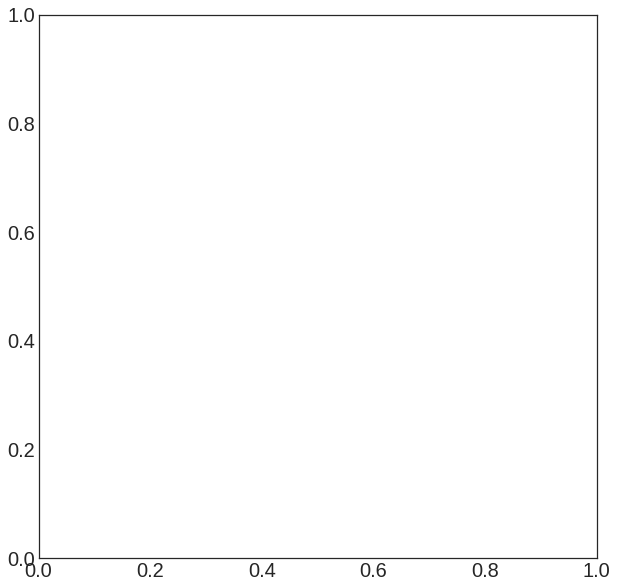

In [437]:
fig, ax = plt.subplots(figsize=(10,10))
for CYP_G, df_CYP in df_all.groupby("CYP_G"):
    #plt.errorbar(x=df_CYP["time"], y=df_CYP["mean"], label=CYP_G ,yerr=df_CYP["se"])

    plt.plot(df_CYP["time"], df_CYP["mean"], label=CYP_G)#,yerr=df_CYP["sd"])
    
    plt.fill_between(df_CYP["time"],df_CYP["mean"]-df_CYP["se"],df_CYP["mean"]+df_CYP["se"],alpha=0.4,edgecolor="gray")
    #df = df_CYP.dropna(subset=["se"])
    
    #err_low_f = interp1d(df["time"],df["mean"]-df["se"], kind='linear')
    #err_high_f = interp1d(df["time"],df["mean"]+df["se"], kind='linear')
    
    #t_err =np.linspace(df["time"].min(),df["time"].max(), num= 30, endpoint=True)
    
    #plt.fill_between(t_err,err_low_f(t_err),err_high_f(t_err),alpha=0.4,edgecolor="gray")
plt.xlabel("time [hr]")
plt.ylabel(f"concentration [{df_CYP['unit'].unique()[0]}]")

plt.legend()
#sns.pointplot(data=df_all, x="time", y="mean",ci=1, hue="CYP_G", ax=ax, err_style="band")

In [ ]:
df

In [ ]:
x = df_CYP["mean"]-df_CYP["se"]
x.dropna()

In [ ]:
df_all

In [ ]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Wu2014")
substance_index = (all_complete.data["substance_name"] == "morphine")
substance_intervention_index = (all_complete.data["substance_name_intervention"] == "codeine")
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]
my_data[["mean","time","sd","se","cv"]] =  my_data[["mean","time","sd","se","cv"]].applymap(eval).applymap(pd.to_numeric)

In [ ]:
intervention_pk = my_data["interventions"].unique()[0]

In [ ]:
 my_data["pharmacokinetics"] = my_data["pharmacokinetics"].apply(eval).apply(lambda x: [e.get("pk") for e in x])

In [ ]:
frames = []
for i, df in my_data.iterrows():
    new_df = pd.concat([df]*len(df["pharmacokinetics"]), axis=1).T.reset_index()
    new_df["pharmacokinetics"] = df["pharmacokinetics"]
    frames.append(new_df)
#df_pk = pd.concat(frames)

In [ ]:
for i, df in my_data.iterrows():
     output_pks = all_complete.data[all_complete.data["timecourse_pk"] == df["pk"]]
        

In [ ]:
output_pks

In [ ]:
idx = (output_pks["unit"] == u"gram * hour / liter")

In [ ]:
output_pks

In [ ]:
output_pks["mean"]

In [ ]:
all_complete.data["timecourse_pk"]

In [ ]:
my_data

In [438]:
frames = []
for i, df in my_data[["time","mean","sd","se","cv","CYP_G","unit"]].iterrows():
    
    
    new_df = pd.concat([df]*len(df["time"]), axis=1).T.reset_index()
    new_df["time"] = df["time"]
    new_df["mean"] = df["mean"]
    new_df["sd"] = df["sd"]
    new_df["se"] = df["se"]
    new_df["cv"] = df["cv"]
    frames.append(new_df)
df_all = pd.concat(frames)
df_all = convert_unit(df_all, "gram / liter", unit_out = "ng/ml", factor=1e+6, data_fields=["mean","sd","se"])

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


AttributeError: 'str' object has no attribute 'append'

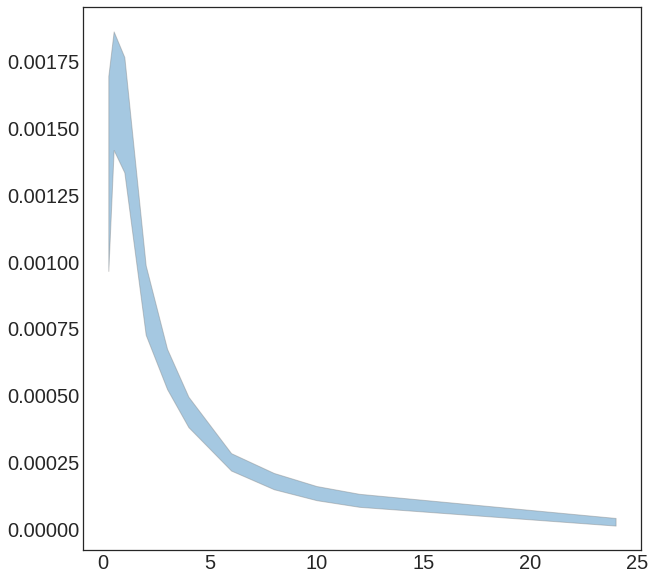

In [408]:
fig, ax = plt.subplots(figsize=(10,10))
for CYP_G, df_CYP in df_all.groupby("CYP_G"):
    plt.fill_between(df_CYP["time"],df_CYP["mean"]-df_CYP["se"],df_CYP["mean"]+df_CYP["se"],alpha=0.4,edgecolor="gray")
    
    
    output_pks[["mean","sd","se","median"]]=output_pks[["mean","sd","se","median"]].applymap(pd.to_numeric)
    convert_unit(df=output_pks,unit_in ="gram * hour / liter", unit_out="ng/ml/hr",factor=1e+6,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="gram / liter",  unit_out="ng/ml", factor=1e+6,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="hour",  unit_out="hr", factor=1,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="liter / hour",  unit_out="l/hr", factor=1,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="liter",  unit_out="l", factor=1,data_fields=["mean","sd","se","median"])
    convert_unit(output_pks,unit_in ="1 / minute",  unit_out="1/min", factor=1,data_fields=["mean","sd","se","median"])
    label = CYP_G
    for i, output in output_pks.iterrows():
        label.append(f"{output['pk']:>10}: {output['mean']:<4} [{output['unit']}:<4]")
    
        plt.plot(df_CYP["time"], df_CYP["mean"], label=label)#,yerr=df_CYP["sd"])

    
    
    
plt.xlabel("time [hr]")
plt.ylabel(f"concentration [{df_CYP['unit'].unique()[0]}]")

plt.legend()
